In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregar o conjunto de dados de diabetes
diabetes = load_diabetes()

In [3]:
df_diabetes = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Adicionar a coluna 'target' ao df
df_diabetes['target'] = diabetes.target

df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [4]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

In [5]:
# Inicializar o modelo de regressão linear
model = LinearRegression()

In [6]:
# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Fazer previsões nos dados de teste
predictions = model.predict(X_test)

In [8]:
# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

In [9]:
print("Erro quadrático médio (MSE):", mse)
print("Raiz do erro quadrático médio (RMSE):", rmse)
print("Coeficiente de determinação (R²):", r2)
print("Erro absoluto médio (MAE):", mae)

Erro quadrático médio (MSE): 2900.1936284934804
Raiz do erro quadrático médio (RMSE): 53.85344583676592
Coeficiente de determinação (R²): 0.4526027629719196
Erro absoluto médio (MAE): 42.79409467959994


In [10]:
df_results = pd.DataFrame({'efetivo': y_test, 'previsto': predictions})
df_results

,efetivo,previsto
0,219.0,139.547558
1,70.0,179.517208
2,202.0,134.038756
3,230.0,291.417029
4,111.0,123.789659
...,...,...
84,153.0,115.011800
85,98.0,78.955842
86,37.0,81.560873
87,63.0,54.379973


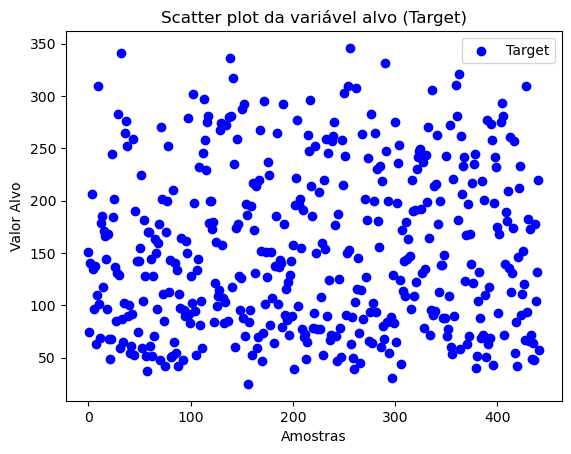

In [11]:
# Criar um scatter plot da variável alvo ('target')
plt.scatter(range(len(diabetes.target)), diabetes.target, color='blue', label='Target')
plt.xlabel('Amostras')
plt.ylabel('Valor Alvo')
plt.title('Scatter plot da variável alvo (Target)')
plt.legend()
plt.show()